# Project Prompt

In this project you must perform and explain simple linear regression using Python on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis. Your submission must be in the form of a git repository containing, at a minimum, the following items:

1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to other types of regression on this data set. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.




# Approach

As the relationship between speed and power in the dataset is not linear but quadratic, I am not entirely certain of what the lecturer intended to communicated by the project prompt. I presume the reference to simple linear regression is supposed to be a kind of 'trap' as the relationship between speed and power is clearly quadratic. This would seem to be yet another case of the very poor standard expected of students on this course and the unending condenscion shown towards our intelligence.


1. Read the dataset into a Pandas dataframe, display the dataframe, plot its two variables using pyplot, and perform a visual analysis.

2. Manually perform simple linear regression on the dataset, plot the linear regression model applied to the Speed values, and calculate the cost of the linear regression model. Use polyfit function to visually verify that the manual method was correctly carried out.

3. Use Sklearn to perform linear regresssion, and compare the results with the manual attempt.

4. Repeat steps 2 and 3 but this time using quadratic regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make matplotlib show interactive plots in the notebook.
%matplotlib inline

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv')
# the first and last few rows have power values of zero, so we increase the number displayed
pd.set_option('display.min_rows', 30)
df

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


Text(0, 0.5, 'power')

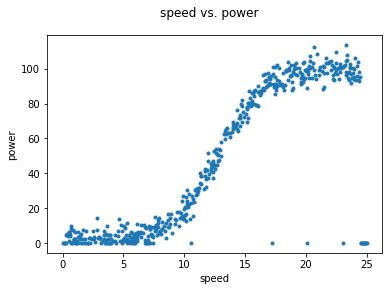

In [3]:
columns = df.columns
plt.plot(df[columns[0]], df[columns[1]], '.')
plt.suptitle(f'{columns[0]} vs. {columns[1]}')
plt.xlabel(f'{columns[0]}')
plt.ylabel(f'{columns[1]}')

We can immediately see that we are dealing with a [Sigmoid-like function](https://en.wikipedia.org/wiki/Sigmoid_function):



<img src="https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg" width="400" height="500" align="left">

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>

However, more relevant to our purpose is the even more basic fact that there is clearly a very strong relationship between speed and power, although it not linear but quadratic. The other important thing to notice is that there are a clear number of outliers in the sample where speed is relatively high but power is 0, and in particular, the last 10 points in the sample have power of zero, even though they have a very high speed value. Because these points clearly are not typical outliers in the sense that they all have the same y value and are so far from what we would expect them to be, there are really only two interpretations of their values:

1. They were incorrectly measured (perhaps the power values simply weren't recorded, and thus were entered as zero.

2. They values are accurate, and are explained by an external influence that over-rided the relationship between speed and power (e.g. perhaps their was no capacity on those days to store the electricity generated, so despite high speeds zero power was generated).

Although the repeated zero values for power for the last points of the sample is suspicious, the most responsible response to these zero values would likely be to include then as legitimate values, due to the fact that there are not many of them, so they are unlikely to significantly influence our models, and the fact that there is a reasonably intuitive and convincing reason why they might be legitimate (the external influence theory). For that reason I will not shed the sample of those points where speed is relatively high but power is zero.

First, then, due to the ridiculous project prompt, we must perform simple linear regression...

## Simple Linear Regression - Manual

m is 4.917596 and c is -13.899903.


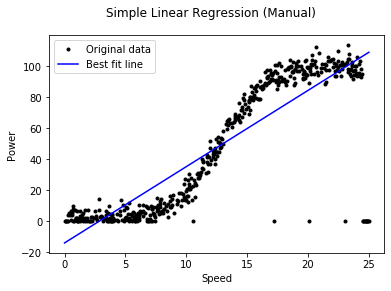

Cost with m =  4.92 and c = -13.90: 234241.16


In [22]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of each column of dataframe
s_avg = np.mean(df[columns[0]])
p_avg = np.mean(df[columns[1]])

# Subtract means from values
s_zero = df[columns[0]] - s_avg
p_zero = df[columns[1]] - p_avg

# The best m is found by the following calculation.
m = np.sum(s_zero * p_zero) / np.sum(s_zero * s_zero)
# Use m from above to calculate the best c.
c = p_avg - m * s_avg

print("m is %8.6f and c is %6.6f." % (m, c))


# Plot the best fit line.
plt.plot(df[columns[0]], df[columns[1]], 'k.', label='Original data')
plt.plot(df[columns[0]], m * df[columns[0]] + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.suptitle("Simple Linear Regression (Manual)")
plt.xlabel('Speed')
plt.ylabel('Power')
plt.legend()

# Show the plot.
plt.show()

cost = lambda m,c: np.sum([(df[columns[1]][i] - m * df[columns[0]][i] - c)**2 for i in range(df[columns[0]].size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))

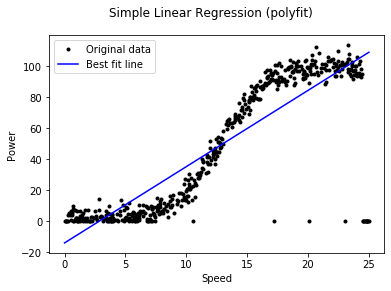

In [23]:
# this time will will simply use numpy's polyfit method
m, c = np.polyfit(df[columns[0]], df[columns[1]], 1)


plt.plot(df[columns[0]], df[columns[1]], 'k.', label='Original data')
plt.plot(df[columns[0]], m * df[columns[0]] + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.suptitle("Simple Linear Regression (polyfit)")
plt.xlabel('Speed')
plt.ylabel('Power')
plt.legend()

# Show the plot.
plt.show()

We can see that our manual simple linear regression conforms with the results of polyfit(). However, as expected, it is clear that a straight line will not adequately account for the function f(power) = speed. When speed is between 3 and 12, power is consistently under-estimated; when speed is between 12 and 22, power is consistently overestimated. This is obviously due to the fact that the relationship between speed and power is quadratic rather than linear. There is really no need to train a linear regression model and then test for predictive capacity - clearly a quadratic model will perform better.

We will thus need to perform quadratic regression to create a satisfactory model for predicting power based on speed.


## Quadratic Linear Regression

The quick-win next step would be to use the polyfit method again but with a different third parameter value, i.e. 2, 3, 4 etc. This will calculate a quadratic regression with 2, 3, 4, etc. as the highest power in the function.

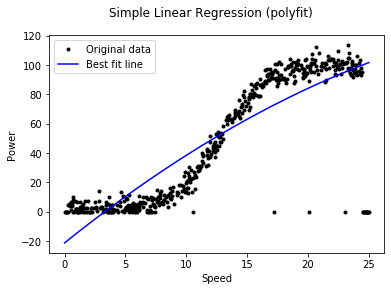

In [36]:
# this time will will simply use numpy's polyfit method
sq, one, const = np.polyfit(df[columns[0]], df[columns[1]], 2)


plt.plot(df[columns[0]], df[columns[1]], 'k.', label='Original data')
plt.plot(df[columns[0]], (sq*df[columns[0]]**2 + one * df[columns[0]] + const), 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.suptitle("Simple Linear Regression (polyfit)")
plt.xlabel('Speed')
plt.ylabel('Power')
plt.legend()

# Show the plot.
plt.show()

A quadratic function with the highest exponent as 2 is clearly not a good model for our data. We should try 3 as the highest exponent next.

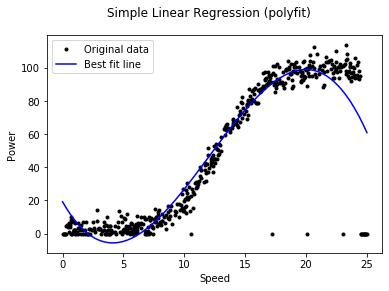

In [37]:
# this time will will simply use numpy's polyfit method
three, two, one, zero = np.polyfit(df[columns[0]], df[columns[1]], 3)


plt.plot(df[columns[0]], df[columns[1]], 'k.', label='Original data')
plt.plot(df[columns[0]], (three*df[columns[0]]**3 + two*df[columns[0]]**2 + one * df[columns[0]] + zero), 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.suptitle("Simple Linear Regression (polyfit)")
plt.xlabel('Speed')
plt.ylabel('Power')
plt.legend()

# Show the plot.
plt.show()

Clearly, we have found a strong model for our sample. The only cavet here is that power cannot go below zero, and when power is 100, speed is not likely to be less than 90.